## Parametry

In [10]:
MODEL_NAME = "trained_model.h5"
LEARNING_RATE = 0.001

## Wczytanie modelu z pliku

In [11]:
from tensorflow.keras.models import load_model
from tensorflow_core.python.keras.optimizer_v2.rmsprop import RMSProp
from tensorflow.keras.layers import LeakyReLU
from script.main.loss_functions import *

model = load_model('../resources/%s' % MODEL_NAME, compile=False, custom_objects={'LeakyReLU': LeakyReLU})
model.compile(loss=mean_square_loss_func, optimizer=RMSProp(lr=LEARNING_RATE), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 37, 1024)          4489216   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dense (Dense)                (None, 19)                19475     
Total params: 12,901,395
Trainable params: 12,901,395
Non-trainable params: 0
_________________________________________________________________


## Wczytanie danych testowych z pliku

In [12]:
import numpy as np

X_test = np.load("../resources/test_data/X_test.npy")
Y_test = np.load("../resources/test_data/Y_test.npy")
test_series = np.load("../resources/test_data2.npy")

## Porównanie zmienności temperatur

(37, 71)


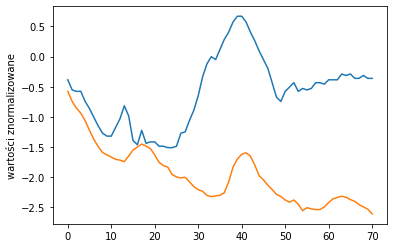

In [33]:
import matplotlib.pyplot as plt
from script.main.date_time_tools import get_next_hour

temps = test_series[0:71].transpose()
month = temps[31:37,1]
for i in range(71):
    predicted = model.predict(np.array([temps,]))
    final_pred = predicted[0,:]
    final_pred = np.append(final_pred, get_next_hour(temps[:,69:]))
    final_pred = np.append(final_pred, month)
    temps = np.append(temps, np.array([final_pred,]).transpose(), axis=1)
    temps = temps[:,1:]

print(temps.shape)
plt.plot(range(0,71),np.squeeze(test_series.transpose()[1:2, 71:(71+71)]))

plt.plot(range(0,71), np.squeeze(temps[1:2,:]))

plt.ylabel('wartości znormalizowane')
plt.show()

In [ ]:
results = model.evaluate(X_test, Y_test, batch_size=32)
print('test loss, test acc:', results)

## Zmiennośc błędu w czasie

In [ ]:
errors = [] 
for pred, real in zip(X_test[0:1,:,:], temps[:,:])